In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.cloud import bigquery

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
def plot_loss_accuracy(history, title=None):

    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

In [3]:
def plot_loss_accuracy_recall(history, title=None):

    fig, ax = plt.subplots(1,3, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    # --- RECALL

    ax[2].plot(history.history['recall'])
    ax[2].plot(history.history['val_recall'])
    ax[2].set_title('Model Recall')
    ax[2].set_ylabel('Recall')
    ax[2].set_xlabel('Epoch')
    ax[2].legend(['Train', 'Test'], loc='best')
    ax[2].set_ylim((0,1))
    ax[2].grid(axis="x",linewidth=0.5)
    ax[2].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

In [4]:
# df = pd.read_csv('../raw_data/archive/hmnist_28_28_RGB.csv')

In [5]:
def get_data_from_bq(
        gcp_project:str,
        query:str,
        data_has_header=True
    ) -> pd.DataFrame:
    """
    Retrieve `query` data from BigQuery
    """
    client = bigquery.Client(project=gcp_project)
    query_job = client.query(query)
    result = query_job.result()
    df = result.to_dataframe()
    df = df.astype("float64")
    return df

GCP_PROJECT = "skin-scan-461716"
BQ_DATASET = "skin_scan"

query = f"""
        SELECT *
        FROM `{GCP_PROJECT}`.{BQ_DATASET}.train_28x28
    """

df = get_data_from_bq(f"{GCP_PROJECT}", query)

In [6]:
df.columns

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [7]:
X = df.drop(columns=['label'])
y = df['label']

In [8]:
X_reshaped = X.values.reshape(-1, 28, 28, 3)

In [9]:
# Convert y to one-hot encoding
y_cat = to_categorical(y)
y_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
X = X/255.0

In [27]:
X_train, X_test,y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.3, random_state=42)

# Model Architecture

In [28]:
#Model Architecture ---

model = Sequential([
    Input(shape=(28, 28, 3)),  # or (28, 28, 3) for RGB
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(7, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,807 (221.90 KB)

 Trainable params: 56,807 (221.90 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy','recall']) # maybe recall

In [31]:
y_train.shape

(7010, 7)

In [36]:
es = EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32,verbose=2, validation_split=0.2, callbacks=[es])

Epoch 1/100
176/176 - 1s - 4ms/step - accuracy: 0.7181 - loss: 0.7587 - recall: 0.6266 - val_accuracy: 0.7197 - val_loss: 0.8100 - val_recall: 0.6184
Epoch 2/100
176/176 - 1s - 4ms/step - accuracy: 0.7211 - loss: 0.7305 - recall: 0.6309 - val_accuracy: 0.7068 - val_loss: 0.8223 - val_recall: 0.6113
Epoch 3/100
176/176 - 1s - 4ms/step - accuracy: 0.7227 - loss: 0.7246 - recall: 0.6298 - val_accuracy: 0.7076 - val_loss: 0.8325 - val_recall: 0.6491
Epoch 4/100
176/176 - 1s - 4ms/step - accuracy: 0.7318 - loss: 0.7134 - recall: 0.6434 - val_accuracy: 0.7140 - val_loss: 0.8015 - val_recall: 0.6405
Epoch 5/100
176/176 - 1s - 4ms/step - accuracy: 0.7366 - loss: 0.7020 - recall: 0.6476 - val_accuracy: 0.7026 - val_loss: 0.8654 - val_recall: 0.6455
Epoch 6/100
176/176 - 1s - 4ms/step - accuracy: 0.7307 - loss: 0.7066 - recall: 0.6369 - val_accuracy: 0.6961 - val_loss: 0.8472 - val_recall: 0.6348
Epoch 7/100
176/176 - 1s - 4ms/step - accuracy: 0.7338 - loss: 0.6877 - recall: 0.6489 - val_accurac

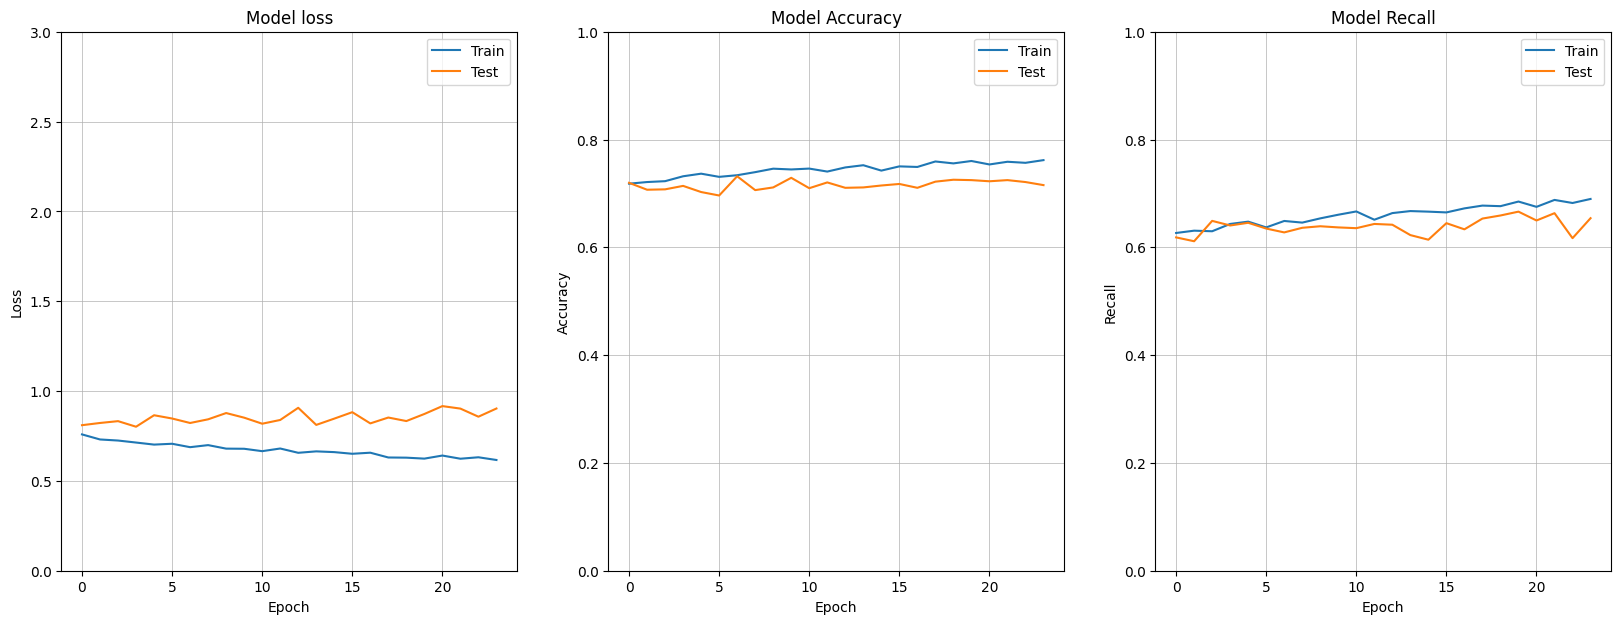

In [37]:
# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()

plot_loss_accuracy_recall(history, title=None)

In [44]:
pd.DataFrame(history.history)

,accuracy,loss,recall,val_accuracy,val_loss,val_recall
0,0.718081,0.758736,0.626605,0.719686,0.810001,0.618402
1,0.721113,0.730544,0.630884,0.706847,0.822350,0.611270
2,0.722718,0.724589,0.629815,0.707561,0.832529,0.649073
3,0.731812,0.713420,0.643367,0.713980,0.801470,0.640514
4,0.736626,0.701980,0.647646,0.702568,0.865381,0.645506
5,0.730742,0.706637,0.636947,0.696148,0.847192,0.634807
6,0.733773,0.687656,0.648894,0.731812,0.822245,0.627675
7,0.739479,0.699078,0.645863,0.706134,0.842742,0.636234
8,0.745899,0.679544,0.653709,0.711127,0.877572,0.639087
9,0.744472,0.678783,0.660485,0.728959,0.851842,0.636947


In [48]:
np.max(history.history["val_accuracy"])

np.float64(0.7318117022514343)

In [41]:
print("Loss,    Accuracy,   Recall")
model.evaluate(X_test, y_test)

Loss,    Accuracy,   Recall
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6993 - loss: 0.8483 - recall: 0.6254


[0.8531654477119446, 0.6971713900566101, 0.6229617595672607]